<a href="https://colab.research.google.com/github/madonnaojorin/Intro-to-Infectious-Disease-Modeling/blob/main/Compartmental_model_II_Completed_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compartmental model II

## SEIR model with demography

In the previous computer lab, we have learned that SIR model, SEIR model and SEIV model. <br>
In those models, we were focusing on a single epidemic in a short period with at most half a year. <br> 
However, there are many diseases which is in our community for many years and we haven't succeeded to eliminate them such as Measles, Rubella, or Chickenpox.<br>
So, let's incorporate demography (births and deaths) into a model describing the Measles transmission dynamics of an immunizing infection.<br> 

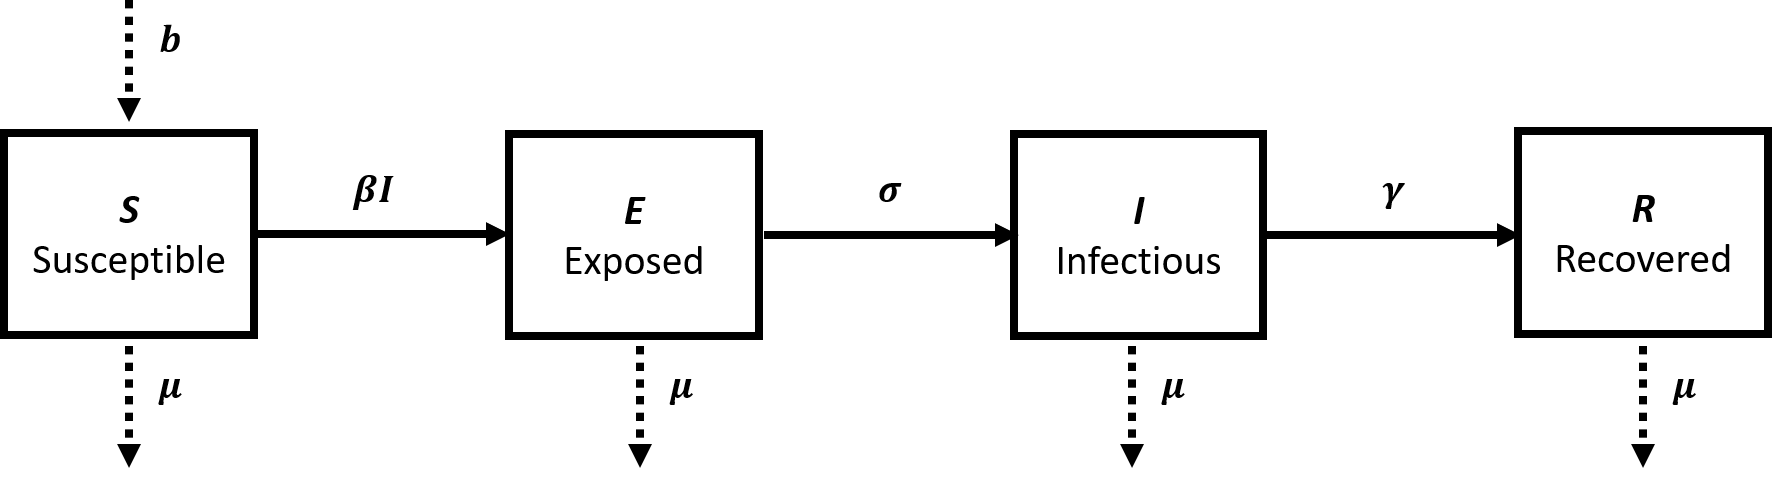

#### (1) Please write down the system of equations for this compartmental model on a paper

##########################  SOLUTION ##############################<br>
A mathematical description of the above SEIR model with demography using differential equations are <br>
\begin{align}
\frac{dS}{dt} &= b N −\beta \frac{I}{N}S - \mu S \\
\frac{dE}{dt} &= \beta \frac{I}{N}S − (\sigma + \mu) E \\
\frac{dI}{dt} &= \sigma E − (\gamma + \mu) I\\
\frac{dR}{dt} &= \gamma I - \mu R \\
\end{align}
With the total population $N = S + E + I + R$.

Assume $b = \mu$ so the population is constant. ($\mu N = \mu S + \mu E + \mu I + \mu R$)

#### (2) Next, please write down the code for ode functions

In [ ]:
##########################  SOLUTION ##############################
# System of ODEs
SEIR <- function(time, variables, parameters) {
  with(as.list(c(variables, parameters)), {
    dS <-  mu * N -beta * I/N * S -mu * S
    dE <-  beta * I/N * S -sigma * E -mu * E
    dI <-  sigma * E -gamma * I -mu * I
    dR <-  gamma * I -mu * R
    return(list(c(dS, dE, dI, dR)))
  })
}

### Characteristics of Measles 

Before moving onto implementing code, let's briefly check what Measles is.<br>
Why Measles? Because Measles is one of the most contagious diseases. <br>

**Measles ...**
- is caused by measles virus<br>
- is highly contagious; approximately 90 % of susceptible household contacts acquire the disease<br>
- cause more than 140,000 deaths in 2018 worldwide<br>
- has CFR of about 15%<br>
- is known to follow roughly standard incidence transmission [Bjornstad(2002)Ecol Monog]<br>

Following table shows numbers for Measles characteristics.

| Parameter  |  Value  |
| :---- | ---- |
|  $R_0$  |  12 - 18  |
|  Pre-infectious period  |  6 - 9 days  |
|  Infectious period  |  6 - 7 days  |
|  Life expectancy  |  70 years  |

#### (3) Parameter values 

Knowing those characteristics, let's implement our model. <br>
For simplicity, let's assume that $R_0 = 13$, pre-infectious period = 8 days and and infectious period = 7 days. <br>
Remember $R_0 = \frac{\beta}{\gamma}$

In [ ]:
# Parameters
R0 = 13
Pre_infectious = 8
Infectious = 7

(parameter <- c(
  mu = 1 / (70 * 365),           # birth rate, death rate (/day)
  beta  = R0/Infectious,         # infectious contact rate (/person/day)
  sigma = 1/Pre_infectious,      # the rate at which individuals become infectious (/day)
  gamma = 1/Infectious           # recovery rate (/day)
))

mu         beta        sigma        gamma 
3.913894e-05 1.857143e+00 1.250000e-01 1.428571e-01

#### (4) Other elements are similar to SIR/SEIR models

In [ ]:
library(deSolve)
# Population
N = 100000 
initial_values <- c(
  S = N - 1,  # number of susceptibles at time = 0
  E = 0,      # number of exposed at time = 0
  I = 1,      # number of infectious at time = 0
  R = 0       # number of recovered (and immune) at time = 0
)

# Time
time_values <- seq(0, 25550, by = 1) # days

# ODE solver
SEIR_results <- ode(
  y = initial_values,
  times = time_values,
  func = SEIR,
  parms = parameter
)

# Modify data format
SEIR_plot <- as.data.frame(SEIR_results)

Warning message:
"package 'deSolve' was built under R version 3.6.3"

#### (5) Plot the number of new infectious individuals 

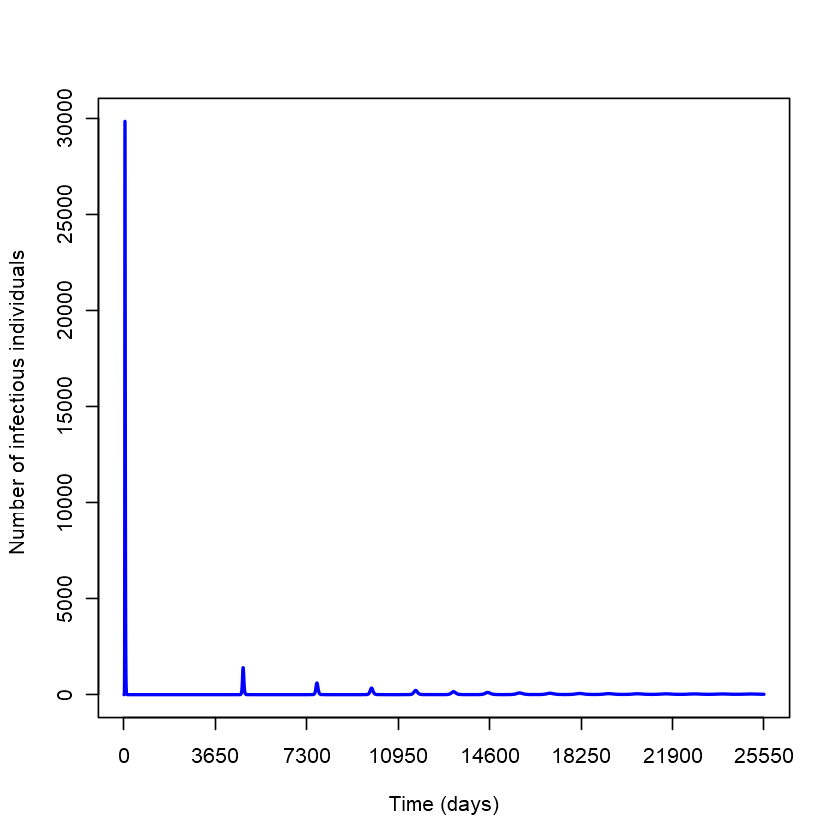

In [ ]:
plot(SEIR_plot$time, SEIR_plot$I, type = "l", col = "blue", 
     xlab = "Time (days)", ylab = "Number of infectious individuals", 
     lwd = 2,xaxt  = "n")
axis(side=1, at=seq(0,25550,by=3650))
options(repr.plot.width=6, repr.plot.height=4)

As you can see, there is a big spike around the first year and few small spikes every decade. <br>
Let's closely look at what those small spikes look like. 

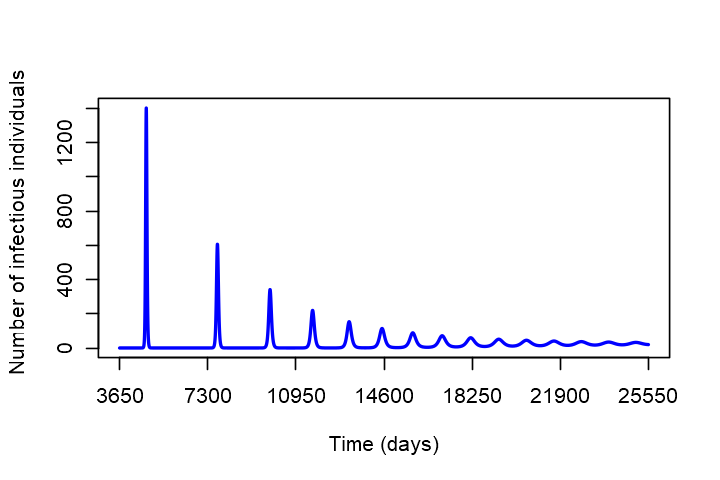

In [ ]:
plot(SEIR_plot[-(0:3650),"time"], SEIR_plot[-(0:3650),"I"], type = "l", col = "blue", 
     xlab = "Time (days)", ylab = "Number of infectious individuals", 
     lwd = 2,xaxt  = "n")
axis(side=1, at=seq(3650,25550,by=3650))

#plot(SEIR_plot[3650:25550,"time"], SEIR_plot[3650:25550,"I"], type = "l", col = "blue", 
#     xlab = "Time (days)", ylab = "Number of infectious individuals", 
#     lwd = 2,xaxt  = "n")

Now you can see the number of infecteds are clearly oscillating.<br>
Why do you think this is happening?<br>
We are having constant population, and same parameter values with SEIR without demography.<br>
What do you think is the main reason that is causing this oscilation?  Susceptible population? Infected population? Recovered population?<br>

#### Answers

In [ ]:
# The main reason is the effect of births entering the population on the proportion of the population that is susceptible.

#### (6) Plot the susceptible and infectives together

Let's see susceptible and infectious curve together.

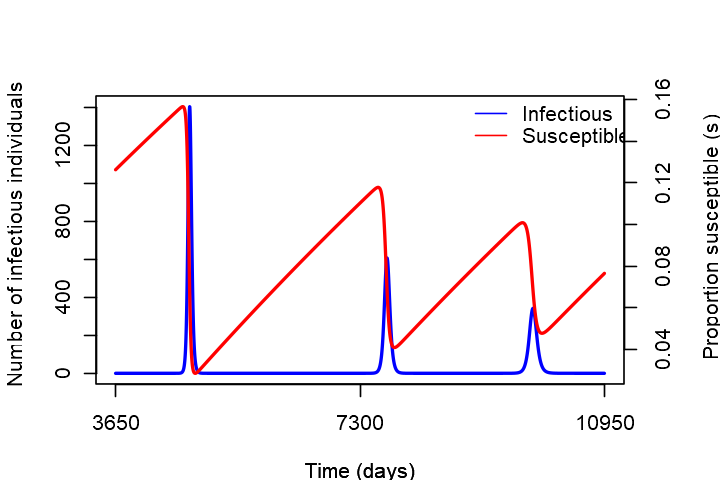

In [ ]:
par(mar = c(4, 4, 4, 4))
plot(SEIR_plot[(3650:10950),"time"], SEIR_plot[(3650:10950),"I"], type = "l", col = "blue", 
     xlab = "Time (days)", ylab = "Number of infectious individuals", 
     lwd = 2,xaxt  = "n",)
axis(side=1, at=seq(3650,10950,by=3650))
par(new = TRUE)   
plot(SEIR_plot[(3650:10950),"time"], SEIR_plot[(3650:10950),"S"]/rowSums(SEIR_plot[(3650:10950),]), type = "l", col = "red", 
     xlab = "Time (days)", lwd = 2,xaxt  = "n",axes = FALSE, ylab = "")
mtext("Proportion susceptible (s)",side = 4, line = 3)  # right y label
axis(4)  
legend("topright",c("Infectious", "Susceptible"), 
       col = c("blue","red"), lty = 1, bty = "n", cex = 1, y.intersp=2)

As you can see, the proportion of susceptible and the number of infectious have relationship. <br>
The main reason for the cycle is inflow of susceptible newborns.<br>

### How are you going to improve the model?

Let's look at our model again.

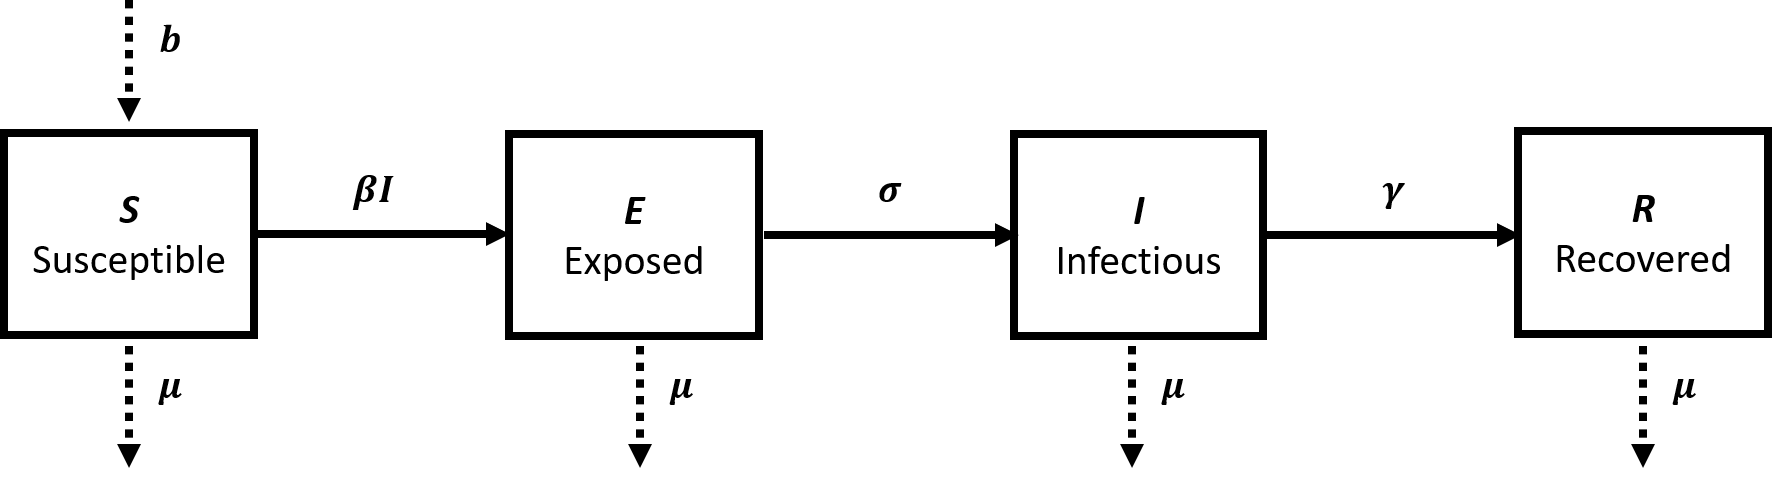

\begin{align}
\frac{dS}{dt} &= b N −\beta \frac{I}{N}S - \mu S \\
\frac{dE}{dt} &= \beta \frac{I}{N}S − (\sigma + \mu) E \\
\frac{dI}{dt} &= \sigma E − (\gamma + \mu) I\\
\frac{dR}{dt} &= \gamma I - \mu R \\
\end{align}
With the total population $N = S + E + I + R$.

Imagine you are working for a goverment, you are asked to improve the model to represent the dynamics of Measles. <br> 
**You can add 1 parameter. What would you add?** <br>
(You may go back to the characteristics of Measles and read them.)

#### Answer

#### (1) Do people die at the same rate in all compartments? 

Notice that Measles cause quite many deaths every year. <br>
So, we want to add death due to Measles.<br>
<br>
But "it is not possible to assume that total population size remains constant if there are deaths due to disease." (CCC: P. 415)<br> 
Because R compartment contains only those individuals who are recovered. <br>
<br>
So, we need to allow **the toal population to vary in time.** <br>
To do so, we assume that birth rate $\Lambda$ is constant. <br>
\begin{align}
\frac{dS}{dt} &= \Lambda −\beta \frac{I}{N}S - \mu S \\
\frac{dE}{dt} &= −\beta \frac{I}{N}S - \sigma E -\mu E \\
\frac{dI}{dt} &= \sigma E - \mu I -\alpha I\\
\frac{dR}{dt} &= \gamma I - \mu R \\
\end{align}
Where <br>
$$\frac{dN}{dt} = \Lambda -(1-f)\alpha I - \mu N $$
With the total population $N = S + E + I + R$.<br>
<br>
Our parameters are the following:

| Parameter  |  Description  |
| :---- | :---- |
|  $\Lambda$ | a constant number of births |
|  $\beta$ | a contact rate  |
|  $\mu$ |  a proportional natural death rate |
|  $\sigma$ |  a rate at which individuals become infectious |
|  $\alpha$ |  a rate of recovery or disease death of infectives  |
|  $f$  |  a fraction of infectives recovering with immunity against reinfection |

#### (2) Let's look at the plot

Lambda         beta           mu        sigma       alpha_        gamma 
3.913894e+00 1.857143e+00 3.913894e-05 1.250000e-01 2.521008e-02 1.428571e-01

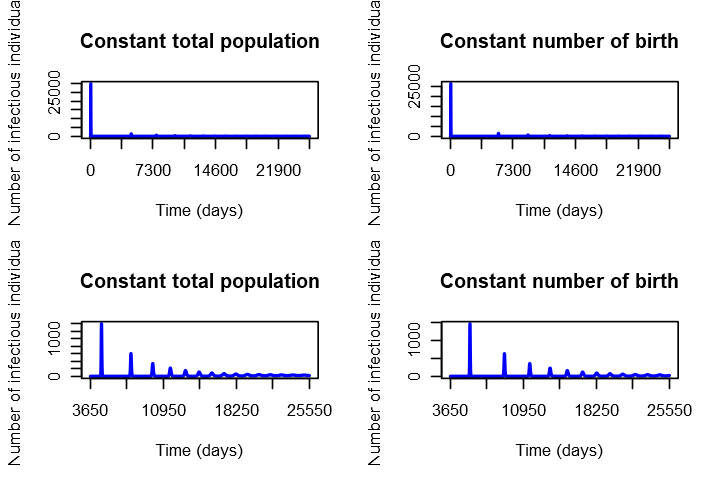

In [ ]:
### SEIR model with constant birth rate 
library(deSolve)

# System of ODEs
SEIR2 <- function(time, variables, parameters) {
  with(as.list(c(variables, parameters)), {
    dS <-  Lambda -beta * I/N * S - mu * S
    dE <-  beta * I/N * S - sigma * E - mu * E
    dI <-  sigma * E - mu * I - (gamma + alpha_) * I 
    dR <-  gamma * I - mu * R
    return(list(c(dS, dE, dI, dR)))
  })
}

# Parameters
R0 = 13
Pre_infectious = 8
Infectious = 7
f = 0.85

(parameter_values2 <- c(
  Lambda = 100000/(70*365),
  beta  = R0/Infectious,  
  mu = 1 / (70 * 365),           
  sigma = 1/Pre_infectious,      
  alpha_ = (1-f) / f * (1 / Infectious),
  gamma = 1/Infectious 
))

# Population
N = 100000 
initial_values2 <- c(
  S = N - 1,  # number of susceptibles at time = 0
  E = 0,      # number of exposed at time = 0
  I = 1,      # number of infectious at time = 0
  R = 0       # number of recovered (and immune) at time = 0
)

# Time
time_values <- seq(0, 25550, by = 1) # days

# ODE solver
SEIR_results2 <- ode(
  y = initial_values2,
  times = time_values,
  func = SEIR2,
  parms = parameter_values2
)

# Modify data format
SEIR_plot2 <- as.data.frame(SEIR_results2)

par(mfrow=c(2,2))
plot(SEIR_plot[,"time"], SEIR_plot[,"I"], type = "l", col = "blue", 
     xlab = "Time (days)", ylab = "Number of infectious individuals",  main = "Constant total population",
     lwd = 2,xaxt  = "n")
axis(side=1, at=seq(0,25550,by=3650))

plot(SEIR_plot2[,"time"], SEIR_plot2[,"I"], type = "l", col = "blue", 
     xlab = "Time (days)", ylab = "Number of infectious individuals",  main = "Constant number of birth",
     lwd = 2,xaxt  = "n")
axis(side=1, at=seq(0,25550,by=3650))

plot(SEIR_plot[-(0:3650),"time"], SEIR_plot[-(0:3650),"I"], type = "l", col = "blue", 
     xlab = "Time (days)", ylab = "Number of infectious individuals", main = "Constant total population",
     lwd = 2,xaxt  = "n")
axis(side=1, at=seq(3650,25550,by=3650))

plot(SEIR_plot2[-(0:3650),"time"], SEIR_plot2[-(0:3650),"I"], type = "l", col = "blue", 
     xlab = "Time (days)", ylab = "Number of infectious individuals",  main = "Constant number of birth",
     lwd = 2,xaxt  = "n")
axis(side=1, at=seq(3650,25550,by=3650))
options(repr.plot.width=7, repr.plot.height=7)

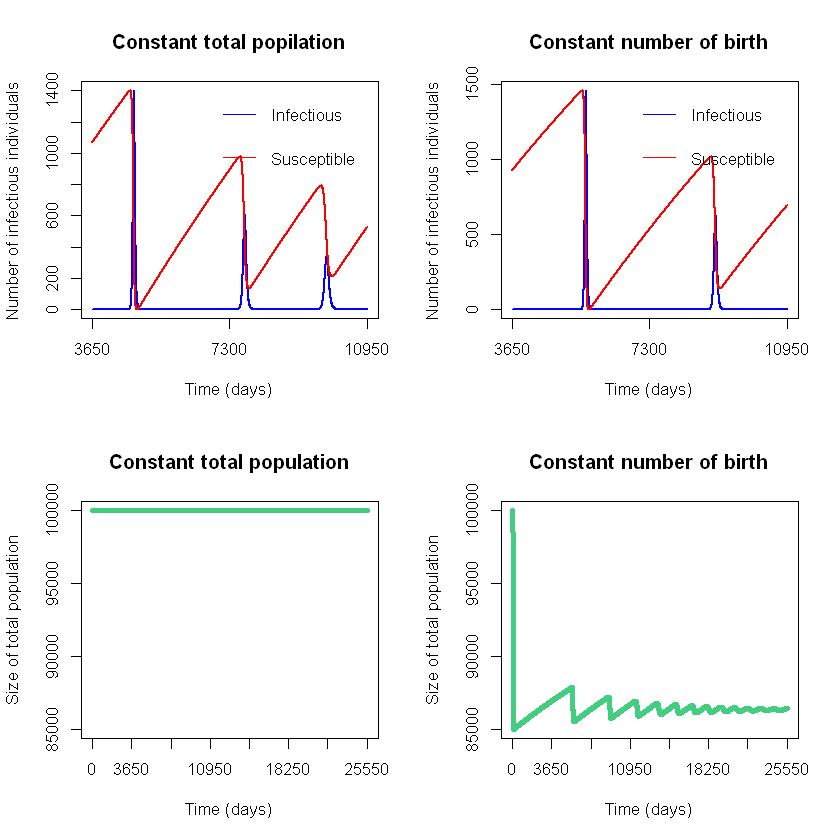

In [ ]:
par(mfrow=c(2,2)) 
### Figure 1 
plot(SEIR_plot[(3650:10950),"time"], SEIR_plot[(3650:10950),"I"], type = "l", col = "blue", 
     xlab = "Time (days)", ylab = "Number of infectious individuals", main = "Constant total popilation",
     lwd = 2,xaxt  = "n",)
axis(side=1, at=seq(3650,10950,by=3650))
par(new = TRUE)   
plot(SEIR_plot[(3650:10950),"time"], SEIR_plot[(3650:10950),"S"]/rowSums(SEIR_plot[(3650:10950),]), type = "l", col = "red", 
     xlab = "Time (days)", lwd = 2,xaxt  = "n",axes = FALSE, ylab = "")
legend("topright",c("Infectious", "Susceptible"), 
       col = c("blue","red"), lty = 1, bty = "n", cex = 1, y.intersp=2)

### Figure 2
plot(SEIR_plot2[(3650:10950),"time"], SEIR_plot2[(3650:10950),"I"], type = "l", col = "blue", 
     xlab = "Time (days)", ylab = "Number of infectious individuals", main = "Constant number of birth",
     lwd = 2,xaxt  = "n",)
axis(side=1, at=seq(3650,10950,by=3650))
par(new = TRUE)   
plot(SEIR_plot2[(3650:10950),"time"], SEIR_plot2[(3650:10950),"S"]/rowSums(SEIR_plot2[(3650:10950),]), type = "l", col = "red", 
     xlab = "Time (days)", lwd = 2,xaxt  = "n",axes = FALSE, ylab = "")
legend("topright",c("Infectious", "Susceptible"), 
       col = c("blue","red"), lty = 1, bty = "n", cex = 1, y.intersp=2)

### Figure 3
plot(SEIR_plot[,"time"], round(rowSums(SEIR_plot[,-1])), type = "l", col = "seagreen3", 
     xlab = "Time (days)", ylab = "Size of total population", main = "Constant total population",
     lwd = 4,xaxt  = "n", ylim = c(85000,100010))
axis(side=1, at=seq(0,25550,by=3650))

### Figure 4
plot(SEIR_plot2[,"time"], rowSums(SEIR_plot2[,-1]), type = "l", col = "seagreen3", 
     xlab = "Time (days)", ylab = "Size of total population",  main = "Constant number of birth",
     lwd = 4,xaxt  = "n", ylim = c(85000,100010))
axis(side=1, at=seq(0,25550,by=3650))


Those graph for the relationship betweem susceptible and infectious population look almost the same for two models. But if you only look at the total population, you see the difference. 

#### (3) How is the total population changing?

Let's look at the equation $\frac{dN}{dt} = \Lambda -(1-f)\alpha I - \mu N $ <br>
Refember, $f$ is a fraction of infectives recovering with immunity against reinfection.<br>
If $f=1$, what does that mean? Do you recall some model we've learned so far?<br>
<br>
For $f=1$, <br>
$$\frac{dN}{dt} = \Lambda - \mu N $$
(Because everyone is recovering)<br>
So, it's the same as the model above if $\Lambda = \mu N$. Constat total population with no death due to the disease.<br>
Let's plot a graph for this.

[1] 9999997

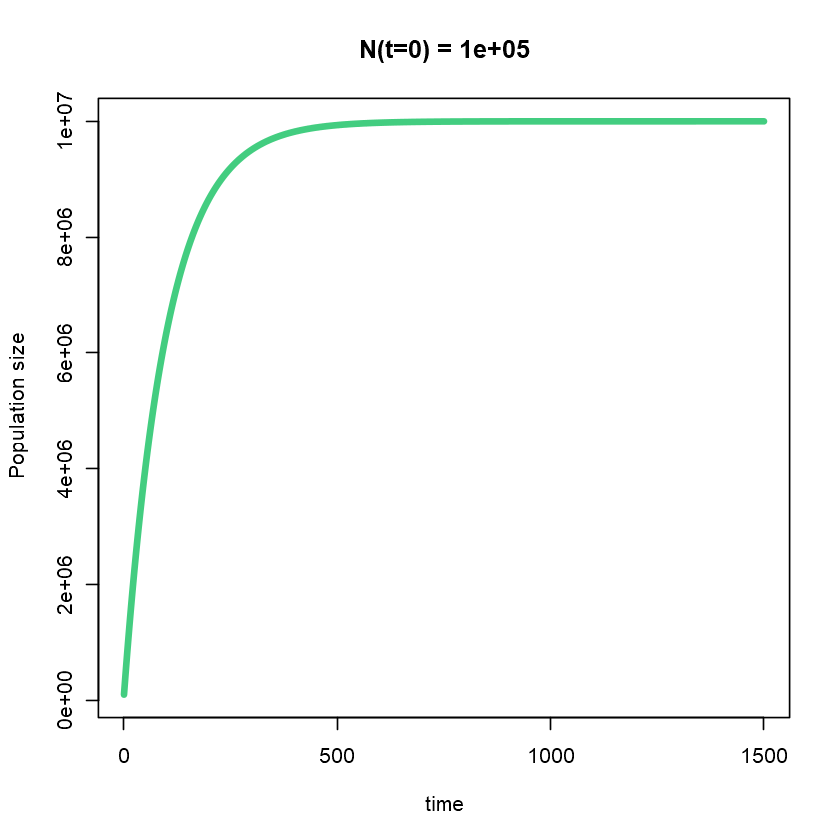

In [ ]:
Lambda = 100000
mu = 0.01

dN <-  function(N) {Lambda - mu * N}

# iterate growth through time
Nt <- function(N, t) {
  for (i in 1:(t - 1)) {
    # population at next time step is population at current time + pop growth
    N[i + 1] <- N[i] + dN(N[i])
  }
  N
}

t <- 1500
Nt0 = 100000
Nt_result = Nt(Nt0, t)
plot(1:t, Nt_result, type = 'l', xlab = 'time', ylab = 'Population size', col = "seagreen3", lwd = 4,
    main = paste('N(t=0) =', Nt0))
Nt_result[length(Nt_result)]

What can you say about the population size?<br>

#### Answers

Total population size apploaches a limit $K=\Lambda/\mu$ where $K$ is the carrying capacity of the population.<br>
What happens if $f<1$?

#### Note on the relationship between $f,\alpha,\gamma$ <br>
$$\frac{dN}{dt} = \Lambda -(1-f)\alpha I - \mu N $$
$\alpha$ is a rate of recovery or disease death of infectives. <br>
$\gamma$ is a reta of recovery. <br>
So, $\alpha$ is $\gamma$ + "rate of disease death", so we let $\alpha_{-}$ = "rate of disease death".<br>
(ie. $\alpha = \alpha_{-} + \gamma$)<br>

$f$ is a fraction of infectives recovering with immunity against reinfection. That is,
$$f= \frac{\alpha_{-}}{\alpha}= \frac{\alpha_{-}}{\alpha_{-}+\gamma}$$
$$\alpha_{-}=\frac{(1-f)\gamma}{f}$$
$$\alpha = \alpha_{-}+\gamma = \frac{(1-f)\gamma}{f}+\gamma$$

In [ ]:
##### For the case f<1
### SEIR model with constant birth rate 
library(deSolve)

# System of ODEs
SEIR2 <- function(time, variables, parameters) {
  with(as.list(c(variables, parameters)), {
    dS <-  Lambda -beta * I/N * S - mu * S
    dE <-  beta * I/N * S - sigma * E - mu * E
    dI <-  sigma * E - mu * I - (gamma + alpha_) * I 
    dR <-  gamma * I - mu * R
    return(list(c(dS, dE, dI, dR)))
  })
}

# Parameters
R0 = 13
Pre_infectious = 8
Infectious = 7

Lambda = 100000/(70*365)
beta  = R0/Infectious
mu = 1 / (70 * 365) 
sigma = 1/Pre_infectious  
gamma = 1/Infectious 
f = 0.85 
alpha_ = (1-f)/f*gamma
alpha = alpha_ + gamma

(parameter_values2 <- c(
  Lambda = Lambda,
  beta  = beta,  
  mu = mu,           
  sigma = sigma,      
  alpha_ = alpha_,
  gamma = gamma
))

# Population
N = 100000 
initial_values2 <- c(
  S = N - 1,  # number of susceptibles at time = 0
  E = 0,      # number of exposed at time = 0
  I = 1,      # number of infectious at time = 0
  R = 0       # number of recovered (and immune) at time = 0
)

# Time
time_values <- seq(0, 255500, by = 1) # days

# ODE solver
SEIR_results2 <- ode(
  y = initial_values2,
  times = time_values,
  func = SEIR2,
  parms = parameter_values2
)

# Modify data format
SEIR_plot2 <- as.data.frame(SEIR_results2)

dN <-  function(f,I,N) {Lambda -(1-f) * alpha * I - mu * N}

# iterate growth through time
Nt <- function(f, N, t) {
  for (i in 1:nrow(SEIR_plot2)) {
          I = SEIR_plot2[i,"I"]

      N[i + 1] <- N[i] + dN(f, I, N[i])
  }
  N
}

Nt_result2 <- Nt(f,N,time_values)
Nt_result2[length(Nt_result2)]

Lambda         beta           mu        sigma       alpha_        gamma 
3.913894e+00 1.857143e+00 3.913894e-05 1.250000e-01 2.521008e-02 1.428571e-01

[1] 86365.65

It is an important skill to be able to "reproduce" a figure. <br>
Looking at the figure, please try to reproduce the figure.

$$\frac{dN}{dt} = \Lambda -(1-f)\alpha I - \mu N$$
Carrying capacity is defined the total population when $t \to \infty$.<br>
Thus, to compute carrying capacity, we solve the following equation for $N$.
$$\Lambda -(1-f)\alpha I(\infty) - \mu N=0$$
But we only know that $I$ upto 255500th day (last row of the data) so we use that value.
$$N = (\Lambda -(1-f)\alpha I(255500))/\mu$$

[1] 86365.65

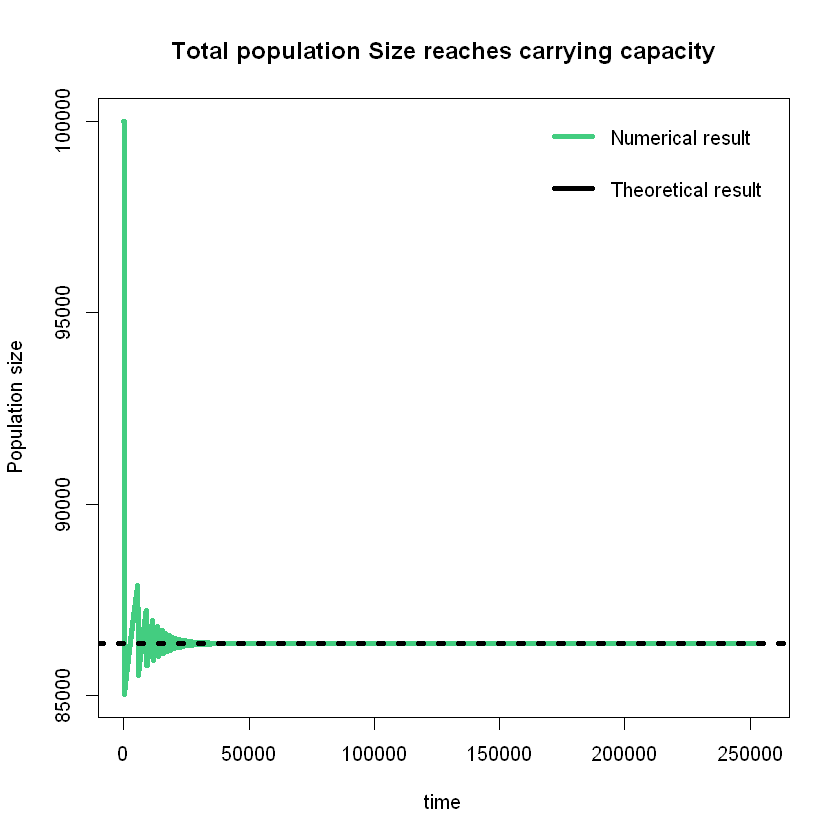

In [ ]:
##### Solution 
plot(seq(0, 255501, by = 1), Nt_result2, type = 'l', xlab = 'time', ylab = 'Population size',col = "seagreen3", lwd = 4,
    main = "Total population Size reaches carrying capacity")

(Theoretical_CC = (Lambda-(1-f)*alpha*SEIR_plot2[nrow(SEIR_plot2),"I"])/mu)
par(new = T)
abline(h=Theoretical_CC,lty="dotted",lwd = 4)
legend("topright",c("Numerical result", "Theoretical result"), 
       col = c("seagreen3","black"), lty = 1, bty = "n", cex = 1, y.intersp=2,lwd = 4)

In [ ]:
# Note
nrow(SEIR_plot2) # number of row of the data
SEIR_plot2[nrow(SEIR_plot2),] # last row of the data
SEIR_plot2[nrow(SEIR_plot2), "I"] #Last row of the data and only I column

[1] 255501

,time,S,E,I,R
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
255501,255500,9054.715,28.46711,21.16748,77261.3


[1] 21.16748

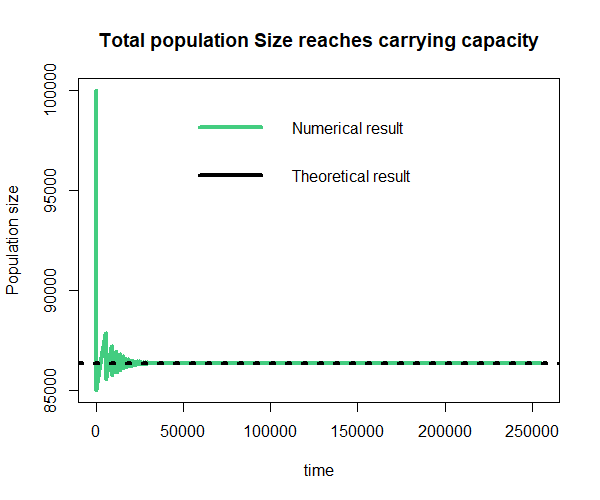